<a href="https://colab.research.google.com/github/mayank458746/My_Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset

In [29]:
!git clone https://github.com/mayank458746/ML_Datasets
%cd ML_Dataset

fatal: destination path 'ML_Datasets' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'ML_Dataset'
/content


Importiing the Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [31]:
#loading csv data to pandas dataframe
gold_data = pd.read_csv('/content/ML_Datasets/gld_price_data.csv')

In [32]:
#print first five rows in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [33]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [34]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [35]:
#getting info about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [36]:
 #checking the missing values
 gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [37]:
#statisitcal measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1) Positive Correlation

2) Negative Correlation

In [38]:
correlation = gold_data.corr()

<AxesSubplot:>

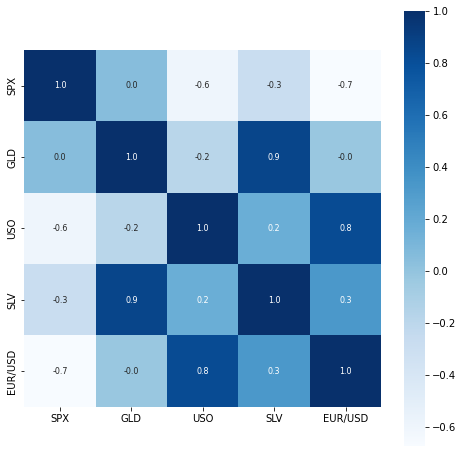

In [39]:
#constructing the heat map
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [40]:
#correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

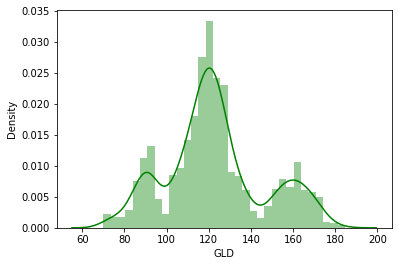

In [41]:
#checking the distribution  of GLD
sns.distplot(gold_data['GLD'],color = 'green')

Splitting the feature and the target

In [42]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [43]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [44]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


 Splitting data into training and testing

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state =2)

Model Training - Random Forest Regressor

In [46]:
regressor = RandomForestRegressor(n_estimators=100)

In [47]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [48]:
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [49]:
print(test_data_prediction)

[168.77119993  82.03969969 115.91220014 127.77760063 120.69600152
 154.50689661 150.50259865 126.15809977 117.47309857 125.9631008
 116.3515012  171.9353009  141.92959907 167.68259853 115.08380025
 117.68150064 139.53430238 170.59980152 158.97050313 158.80210028
 155.15420007 125.00080048 175.83379981 157.65470355 125.27840046
  93.92989977  77.62079972 120.54190012 119.05599912 167.49769917
  88.42750069 125.44560007  91.04900093 117.58320016 121.1215993
 136.15540093 115.50030144 115.16520019 147.62270023 107.36690086
 104.56830273  87.29309821 126.38780077 117.89299982 152.69249924
 119.87139975 108.48519993 107.94259784  93.15420045 126.85939884
  74.74640033 113.6173992  121.21880033 111.20149947 118.80829887
 120.76999924 159.37949994 169.52260086 146.94089662  85.74689829
  94.27310069  86.79699891  90.32170013 119.07710069 126.48580083
 127.42320006 169.42499977 122.21849932 117.16319897  98.40220013
 168.53970111 143.47069857 131.4683031  121.25930214 121.35719943
 119.4914008

In [50]:
# R squared error
error_score_1 = metrics.r2_score(Y_test,test_data_prediction) 
print(error_score_1)

0.9890248773915868


Comparing the actual values and the predicted values

In [51]:
Y_test  = list(Y_test)

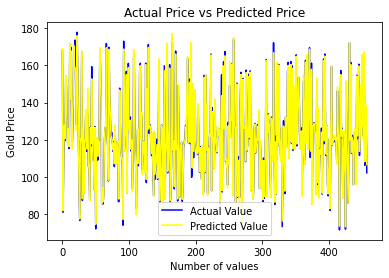

In [52]:
plt.plot(Y_test,color='blue',label = 'Actual Value')
plt.plot(test_data_prediction,color='yellow',label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()